# **Computer Vision 2025 Assignment 3: Deep Learning for Perception Tasks**

This assignment contains 2 questions. The first question probes understanding of deep learning for classification. The second question requires you to write a short description of a Computer Vision method. You wil need to submit two separate PDF files, one for each question.
<br/><br/>

## **Question 1: A Simple Classifier *(20 marks, 60%)***

For this exercise, we provide demo code showing how to train a network on a small dataset called Fashion-MNIST. Please run through the code *"tutorial-style"* to get a sense of what it is doing. Then use the code alongside lecture notes and other resources to understand how to use pytorch libraries to implement, train and use a neural network. For the Fashion-MNIST dataset the labels from 0-9 correspond to various clothing classes so you might find it convenient to **create a python list as follows:**

**class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']**

You will need to answer various questions about the system, how it operates, the results of experiments with it and make modifications to it yourself. You can change the training scheme and the network structure. Organise your own text and code cell to show the answer of each question below. **Detailed requirements:**

In [1]:
# For Numerical Operations & Handling Arrays/Matrices Efficiently
import numpy as np  

# For Creating Static, Animated, & Interactive Plots
import matplotlib.pyplot as plt  

# Provides Time-Related Functions, Useful for Measuring Execution Time or Delays
import time  

# Functional API for Common Operations like Activation Functions & Loss Calculations
import torch.nn.functional as F

# Tools for Controlling Output Display in Jupyter Notebooks
from IPython import display  

# Import Code Book with Custom Function Definitions
from a3code import *

# Some Notebook Magic for Displaying Figures
%matplotlib inline

# Some More Magic For Reloading External Python Modules
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

<br/>

### **Q1.1 *(1 Point)***

Extract 3 images of different types of clothing from the training dataset, print out the size/shape of the training images, and display the three with their corresponding labels.

In [2]:
# Download Training Data from TorchVision's Open FashionMNIST Dataset
training_data = datasets.FashionMNIST(
    root="Data",           # Directory to Store the Dataset
    train=True,            # Specifies this is the Training Set
    download=True,         # Downloads the Dataset if Not Already Present
    transform=ToTensor(),  # Converts Images to PyTorch Tensors & Normalises Pixel Values
)

# Download Test Data from the Same Dataset
test_data = datasets.FashionMNIST(
    root="Data",           # Directory to Store the Dataset
    train=False,           # Specifies this is the Test Set
    download=True,         # Downloads the Dataset if Not Already Present
    transform=ToTensor(),  # Converts Images to PyTorch Tensors
)

# Number of Samples Per Batch to Load During Training/Testing
batch_size = 64

# Create Data Loaders to Iterate Over the Dataset in Batches
train_dataloader = DataLoader(training_data, batch_size=batch_size)  # Loads Training Data in Batches
test_dataloader = DataLoader(test_data, batch_size=batch_size)       # Loads Test Data in Batches

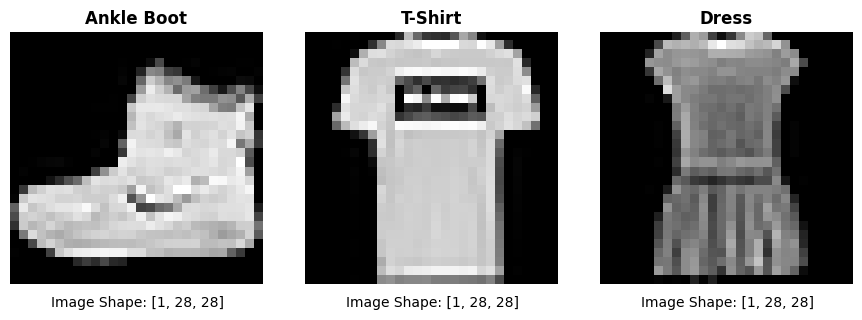

In [3]:
# Build a List of Class Names
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot"
}

# Display 3 Images from the Training Dataset
plt.figure(figsize=(9, 3))

# Find Three Unique Examples
unique_classes = {} # List for Storage
for img, label in training_data:

    # If it is New Add it to List
    if label not in unique_classes:
        unique_classes[label] = img

    # Stop Once there are 3 Examples
    if len(unique_classes) == 3:
        break


# Loop Through First 3 Images
for i, (label, image) in enumerate(unique_classes.items()):
    shape = f"Image Shape: {list(image.shape)}"
    label = labels_map[label]

    # Plot Image
    plt.subplot(1, 3, i+1)
    plt.imshow(image.squeeze(), cmap="gray")  # Squeeze() Removes Channel Dimension
    plt.title(f"{label}", fontweight="bold")
    plt.text(4, 30, f"{shape}", fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show() 

<br/>

### **Q1.2 *(2 Points)***

Run the training code for 10 epochs, for different values of the learning rate. **Fill in the table below and plot the loss curves for each experiment:**

|  LR |Accuracy|
| --- |  ---   |
|  1  | 20.70% |
| 0.1 | 87.40% |
|0.01 | 83.20% |
|0.001| 70.7%  |

In [4]:
# Get CPU or GPU Device for Training
device = "cuda" if torch.cuda.is_available() else "cpu"

# Display which Device is Being Used
print("Using {} device".format(device))  

# Define a Simple Feedforward Neural Network Model
class NeuralNetwork(nn.Module):
    # Define the New Constructor
    def __init__(self):
        super(NeuralNetwork, self).__init__()  # Call the Constructor of nn.Module
        self.flatten = nn.Flatten()            # Flattens Input from (N, 1, 28, 28) to (N, 784)
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),  # First Fully Connected Layer (Input: 784 -> Output: 512)
            nn.ReLU(),              # ReLU Activation
            nn.Linear(512, 512),    # Second Fully Connected Layer
            nn.ReLU(),              # ReLU Activation
            nn.Linear(512, 10)      # Output Layer (10 Classes for FashionMNIST)
        )


    # Define the Forward Pass Function
    def forward(self, x):
        x = self.flatten(x)                  # Flatten the Input
        logits = self.linear_relu_stack(x)   # Pass Through the Linear & ReLU Stack
        return logits                        # Return Raw Scores (logits)

Using cpu device


Epoch 1
-------------------------------
Test Error: 
 Accuracy: 10.0%, Avg loss: 2.305939 

Epoch 2
-------------------------------
Test Error: 
 Accuracy: 10.0%, Avg loss: 2.305846 

Epoch 3
-------------------------------
Test Error: 
 Accuracy: 10.0%, Avg loss: 2.305844 

Epoch 4
-------------------------------
Test Error: 
 Accuracy: 10.0%, Avg loss: 2.305846 

Epoch 5
-------------------------------
Test Error: 
 Accuracy: 10.0%, Avg loss: 2.305843 

Epoch 6
-------------------------------
Test Error: 
 Accuracy: 10.0%, Avg loss: 2.305845 

Epoch 7
-------------------------------
Test Error: 
 Accuracy: 10.0%, Avg loss: 2.305845 

Epoch 8
-------------------------------
Test Error: 
 Accuracy: 10.0%, Avg loss: 2.305844 

Epoch 9
-------------------------------
Test Error: 
 Accuracy: 10.0%, Avg loss: 2.305840 

Epoch 10
-------------------------------
Test Error: 
 Accuracy: 20.7%, Avg loss: 1.729775 

Done!


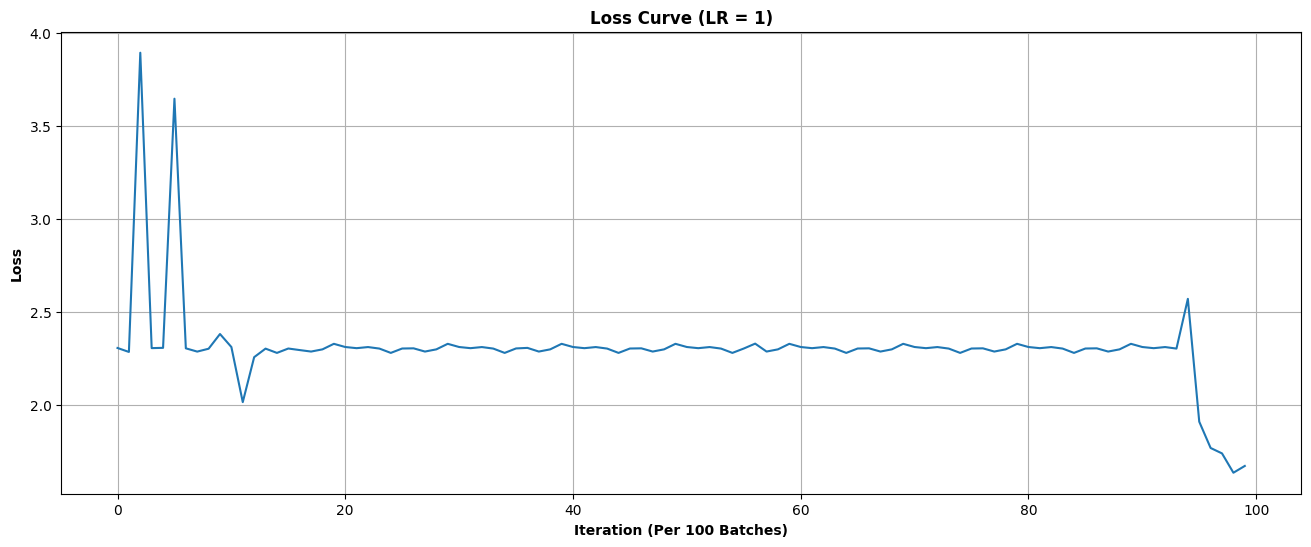

In [5]:
# Instantiate the Model & Move it to the Selected Device (CPU or GPU)
model = NeuralNetwork().to(device)

# Define the Loss Function & the Optimiser (learning Rate)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1)

# Set Epochs
epochs = 10

# Prepare to Store Loss
all_batch_losses = []

# Train & Test the Model
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    epoch_batch_losses = train(train_dataloader, model, loss_fn, optimizer)
    all_batch_losses.extend(epoch_batch_losses)
    test(test_dataloader, model, loss_fn)
print("Done!")

plt.figure(figsize=(16, 6))
plt.plot(all_batch_losses)
plt.xlabel("Iteration (Per 100 Batches)", fontweight="bold")
plt.ylabel("Loss", fontweight="bold")
plt.title("Loss Curve (LR = 1)", fontweight="bold")
plt.grid(True)
plt.show()

Epoch 1
-------------------------------
Test Error: 
 Accuracy: 79.5%, Avg loss: 0.550756 

Epoch 2
-------------------------------
Test Error: 
 Accuracy: 82.4%, Avg loss: 0.475517 

Epoch 3
-------------------------------
Test Error: 
 Accuracy: 83.7%, Avg loss: 0.437412 

Epoch 4
-------------------------------
Test Error: 
 Accuracy: 84.9%, Avg loss: 0.416171 

Epoch 5
-------------------------------
Test Error: 
 Accuracy: 85.4%, Avg loss: 0.402710 

Epoch 6
-------------------------------
Test Error: 
 Accuracy: 86.7%, Avg loss: 0.369693 

Epoch 7
-------------------------------
Test Error: 
 Accuracy: 86.8%, Avg loss: 0.361707 

Epoch 8
-------------------------------
Test Error: 
 Accuracy: 87.2%, Avg loss: 0.353637 

Epoch 9
-------------------------------
Test Error: 
 Accuracy: 87.3%, Avg loss: 0.349974 

Epoch 10
-------------------------------
Test Error: 
 Accuracy: 87.4%, Avg loss: 0.347616 

Done!


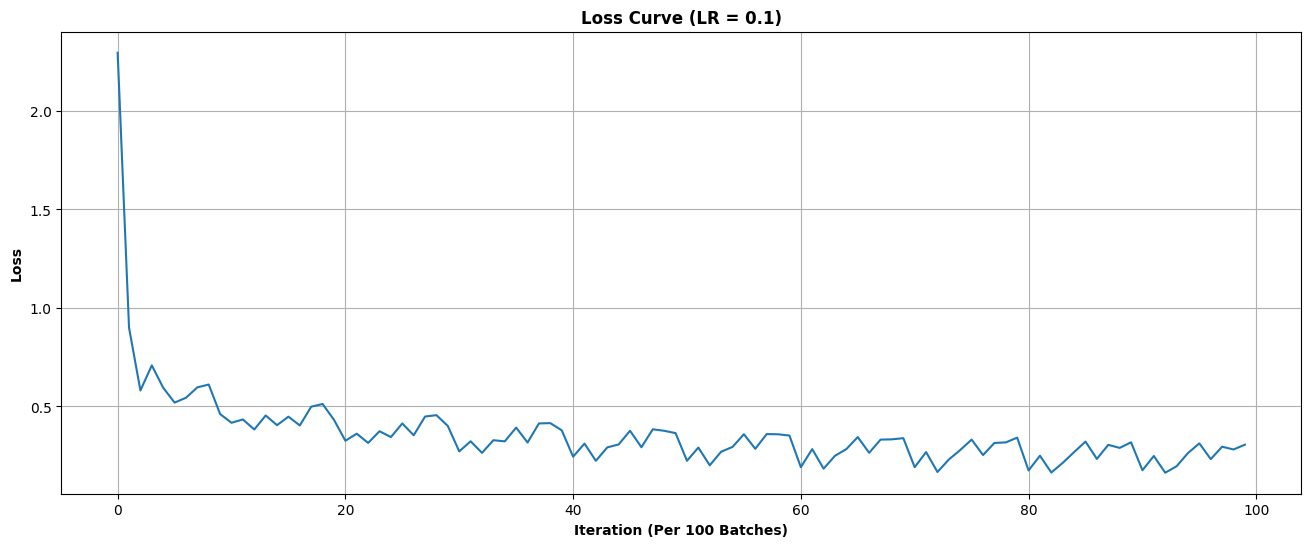

In [6]:
# Instantiate the Model & Move it to the Selected Device (CPU or GPU)
model = NeuralNetwork().to(device)

# Define the Loss Function & the Optimiser (learning Rate)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Set Epochs
epochs = 10

# Prepare to Store Loss
all_batch_losses = []

# Train & Test the Model
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    epoch_batch_losses = train(train_dataloader, model, loss_fn, optimizer)
    all_batch_losses.extend(epoch_batch_losses)
    test(test_dataloader, model, loss_fn)
print("Done!")

plt.figure(figsize=(16, 6))
plt.plot(all_batch_losses)
plt.xlabel("Iteration (Per 100 Batches)", fontweight="bold")
plt.ylabel("Loss", fontweight="bold")
plt.title("Loss Curve (LR = 0.1)", fontweight="bold")
plt.grid(True)
plt.show()

Epoch 1
-------------------------------
Test Error: 
 Accuracy: 70.3%, Avg loss: 0.798861 

Epoch 2
-------------------------------
Test Error: 
 Accuracy: 78.0%, Avg loss: 0.636561 

Epoch 3
-------------------------------
Test Error: 
 Accuracy: 79.8%, Avg loss: 0.570740 

Epoch 4
-------------------------------
Test Error: 
 Accuracy: 80.4%, Avg loss: 0.540568 

Epoch 5
-------------------------------
Test Error: 
 Accuracy: 81.1%, Avg loss: 0.521400 

Epoch 6
-------------------------------
Test Error: 
 Accuracy: 81.6%, Avg loss: 0.506444 

Epoch 7
-------------------------------
Test Error: 
 Accuracy: 82.0%, Avg loss: 0.494321 

Epoch 8
-------------------------------
Test Error: 
 Accuracy: 82.6%, Avg loss: 0.483324 

Epoch 9
-------------------------------
Test Error: 
 Accuracy: 82.9%, Avg loss: 0.473080 

Epoch 10
-------------------------------
Test Error: 
 Accuracy: 83.2%, Avg loss: 0.464581 

Done!


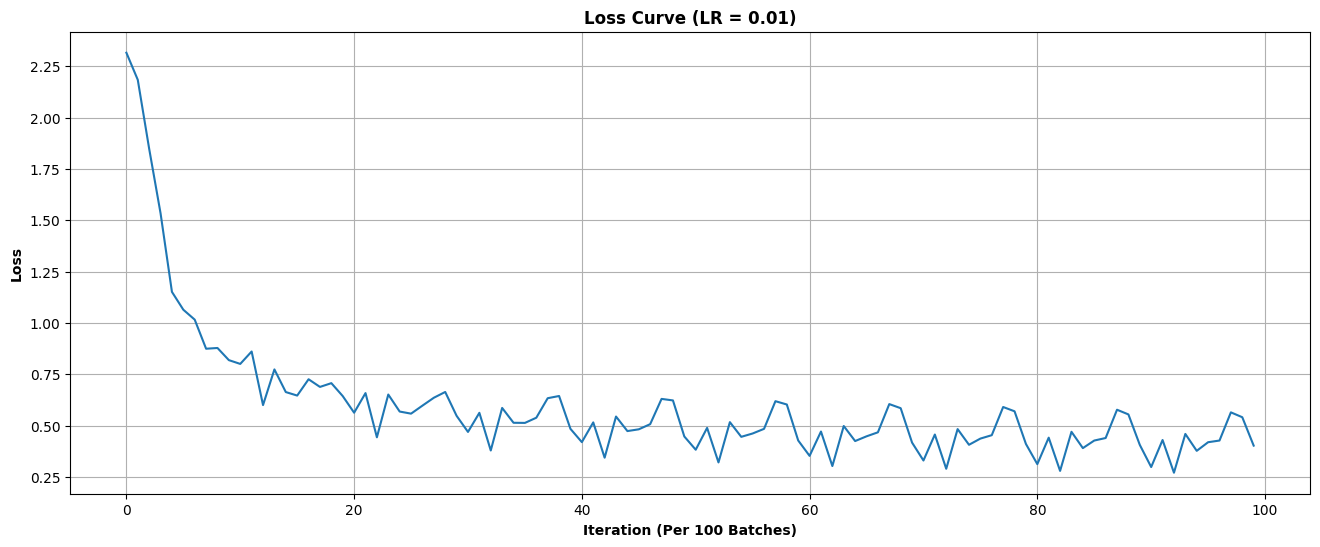

In [7]:
# Instantiate the Model & Move it to the Selected Device (CPU or GPU)
model = NeuralNetwork().to(device)

# Define the Loss Function & the Optimiser (learning Rate)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Set Epochs
epochs = 10

# Prepare to Store Loss
all_batch_losses = []

# Train & Test the Model
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    epoch_batch_losses = train(train_dataloader, model, loss_fn, optimizer)
    all_batch_losses.extend(epoch_batch_losses)
    test(test_dataloader, model, loss_fn)
print("Done!")

plt.figure(figsize=(16, 6))
plt.plot(all_batch_losses)
plt.xlabel("Iteration (Per 100 Batches)", fontweight="bold")
plt.ylabel("Loss", fontweight="bold")
plt.title("Loss Curve (LR = 0.01)", fontweight="bold")
plt.grid(True)
plt.show()

Epoch 1
-------------------------------
Test Error: 
 Accuracy: 52.9%, Avg loss: 2.163357 

Epoch 2
-------------------------------
Test Error: 
 Accuracy: 60.9%, Avg loss: 1.900991 

Epoch 3
-------------------------------
Test Error: 
 Accuracy: 62.2%, Avg loss: 1.527775 

Epoch 4
-------------------------------
Test Error: 
 Accuracy: 63.6%, Avg loss: 1.253682 

Epoch 5
-------------------------------
Test Error: 
 Accuracy: 64.7%, Avg loss: 1.085622 

Epoch 6
-------------------------------
Test Error: 
 Accuracy: 65.9%, Avg loss: 0.978543 

Epoch 7
-------------------------------
Test Error: 
 Accuracy: 67.1%, Avg loss: 0.906585 

Epoch 8
-------------------------------
Test Error: 
 Accuracy: 68.3%, Avg loss: 0.855484 

Epoch 9
-------------------------------
Test Error: 
 Accuracy: 69.6%, Avg loss: 0.817075 

Epoch 10
-------------------------------
Test Error: 
 Accuracy: 70.7%, Avg loss: 0.786570 

Done!


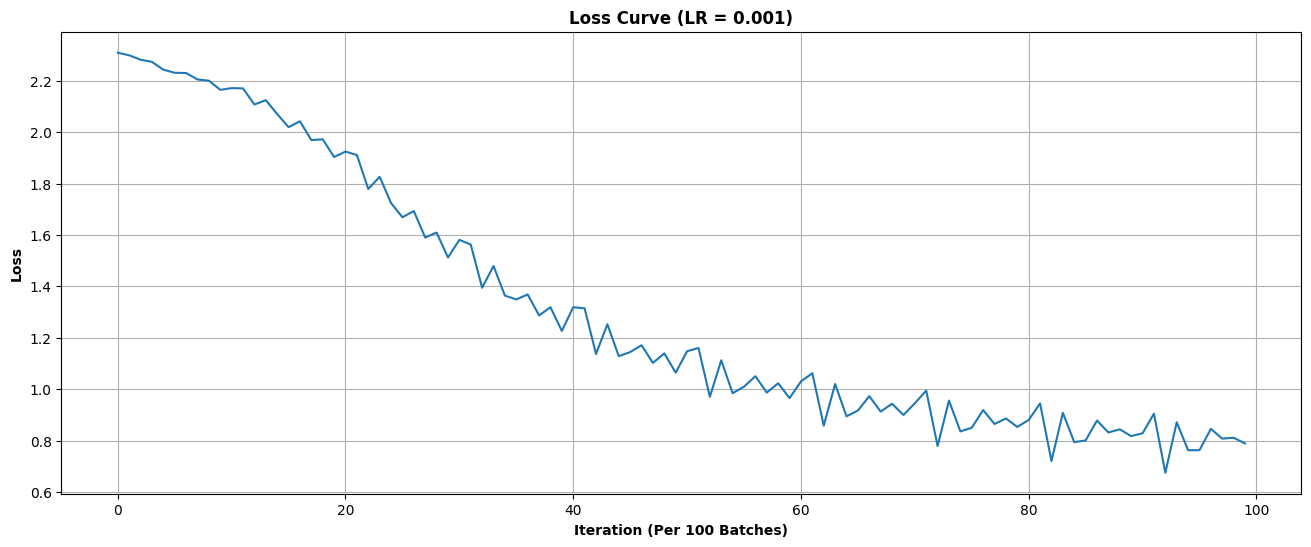

In [8]:
# Instantiate the Model & Move it to the Selected Device (CPU or GPU)
model = NeuralNetwork().to(device)

# Define the Loss Function & the Optimiser (learning Rate)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# Set Epochs
epochs = 10

# Prepare to Store Loss
all_batch_losses = []

# Train & Test the Model
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    epoch_batch_losses = train(train_dataloader, model, loss_fn, optimizer)
    all_batch_losses.extend(epoch_batch_losses)
    test(test_dataloader, model, loss_fn)
print("Done!")

plt.figure(figsize=(16, 6))
plt.plot(all_batch_losses)
plt.xlabel("Iteration (Per 100 Batches)", fontweight="bold")
plt.ylabel("Loss", fontweight="bold")
plt.title("Loss Curve (LR = 0.001)", fontweight="bold")
plt.grid(True)
plt.show()

<br/>

### **Q1.3 *(3 Points)***

Report the number of epochs when the network converges *(or number of epochs for the best accuracy, if it fails to converge)*. Fill in the table below and plot the loss curve for each experiment. **Please run the code for more than 10 epochs *(e.g. 50 or 100)* and report when you observe convergence:**

|Lr|Accuracy|Epoch|
|---|---|---|
|1   |      |     |
|0.1|          |    |
|0.01|         |    |
|0.001  |        |     |

In [9]:
# Insert Code Here

<br/>

### **Q1.4 *(2 Points)***

**Compare the results in table 1 and table 2, what is your observation and your understanding of learning rate?**

***Insert Discussion Here***

---

<br/>

### **Q1.5 *(5 Points)***

Build a wider network by modifying the code that constructs the network so that the hidden layer(s) contain more perceptrons, and record the accuracy along with the number of trainable parameters in your model.  Now modify the original network to be deeper instead of wider *(**i.e.** by adding more hidden layers)*. Record your accuracy and network size findings. Plot the loss curve for each experiment. Also plot the test accuracy and loss for both the wider and deeper architectures and discuss what you observe. **Write down your conclusions about changing the network structure.**

|Structures|Accuracy|Parameters|
|---|---|---|
|Base   |      ||
|Deeper|          ||
|Wider|         ||

In [10]:
# Insert Code

***Add Discussion Notes Here***

- Discuss what you observe Loss curves & accuracy for network sizes
- Disucss what you observe for test accruacy and loss for wider and deeper.
- Write down your conclusions about changing the network structure.

---

<br/>

### **Q1.6 *(2 Points)***

Calculate the mean of the gradients of the loss to all trainable parameters. Plot the gradients curve for the first 100 training steps. What are your observations? Note that this gradients will be saved with the training weight automatically after you call loss.backwards(). **Hint:** The mean of the gradients decrease.

In [11]:
# Insert Code Here

***Add Discussion Notes Here***

- Calculate the mean of the gradients of the loss to all trainable parameters. What are your observations? 
- Hint: The mean of the gradients decrease.

---

<br/>

### **Q1.7 *(5 Points)***

For more explanation of q1.7, you could refer to the following simple instructions: https://colab.research.google.com/drive/1XAsyNegGSvMf3_B6MrsXht7-fHqtJ7OW?usp=sharing.

Modify the network structure and training/test to use a small convolutional neural network instead of an MLP. Discuss your findings with regard to convergence, accuracy and number of parameters, relative to MLPs. **Hint:** Look at the structure of the CNN in the Workshop 3 examples.

In [12]:
# Insert Code Here

***Add Discussion Notes Here***

- Discuss your findings with regard to convergence, accuracy and number of parameters, relative to MLPs.

---

<br/><br/>


# **Question 2: Optional Bonus Question  *(5 Marks, 20% Bonus Marks)***
<br/>

### **Q2.1 *(2 Points)***

Experiment with different activation functions (ReLU, Tanh, Sigmoid) and analyse their impact on training performance.

In [13]:
# Insert Code Here

***Add Discussion Notes Here***

---

<br/>

### **Q2.2 *(1 Point)***

In particular, focus your analysis on the Sigmoid activation function and discuss your finding of training with and without Xavier initialisation. You may use the provided code for Xavier initialisation for this.

In [14]:
# Now We Will Apply Xavier Initialisation to the Model
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            nn.init.zeros_(m.bias)

# Lets Apply the Xavier Initialisation to the Model
model.apply(init_weights)

# Now We Will Train & Test the Model Again with the Xavier Initialisation
epochs = 5

# Training & Testing Loop
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

# Insert Code Here

Epoch 1
-------------------------------
Test Error: 
 Accuracy: 65.8%, Avg loss: 1.255945 

Epoch 2
-------------------------------
Test Error: 
 Accuracy: 69.6%, Avg loss: 0.945941 

Epoch 3
-------------------------------
Test Error: 
 Accuracy: 73.0%, Avg loss: 0.823938 

Epoch 4
-------------------------------
Test Error: 
 Accuracy: 74.8%, Avg loss: 0.754666 

Epoch 5
-------------------------------
Test Error: 
 Accuracy: 76.2%, Avg loss: 0.707533 

Done!


***Add Discussion Notes Here***

---

<br/>

### **Q2.3 *(1 Point)***

Additionally, plot both the gradient and loss curves for your experiments. For gradient analysis, you may select one representative layer to monitor throughout training and briefly explain your choice.

In [15]:
# Insert Code Here

***Add Discussion Notes Here***

---

<br/>

### **Q2.4 *(1 Point)***

**Discuss how gradients and loss behave across the network for different activation functions and initialisation methods if you see any difference.**

***Add Discussion Notes Here***

---

<br/><br/>
## **Question 3: Proposal for Practical Applications *(40%)***

In this part of the assignment you need to write a report about an application of a computer vision algorithm or technique. This can either be an application that you are aware of and possibly even use, such as a phone app, or it could be speculation -- an application that you think would benefit from using computer vision.

**Begin by choosing a particular CV idea, method or problem area, such as:**

**a.** Removing noise in an image.

**b.** Increasing the resolution of an image.

**c.** Detecting and/or identifying objects in an image.

**d.** Segmenting images into constituents parts.

**e.** Estimating the depth of an object from one or more images.

**f.** Estimating the motion of two objects in different frames.

**g.** Others
<br/><br/>


Now think about various ways your chosen technique could be used. Here is a list of possible applications you could consider, but you are not restricted to this list, and there will be credit given for sensible invention outside this list (but no penalty if you don't want to be "inventive"): image editing systems in your phone; enhancement of images from old film; obstacle detection and avoidance for a domestic robot; facial recognition for phone security; cancer detection; person tracking and re-identification in security cameras; sport decision review systems; road-sign detection and interpretation for self-driving cars.
<br/>

This is a little bit back-to-front from what might happen in real life in which the application usually motivates the solution, but the emphasis here is on an understanding of the CV technique.
<br/><br/>


**You need to write a short report *(800 words max)* in which you do the following:**

**1.** Clearly define the CV problem/area and describe its application scenarios.

**2.** Briefly describe a solution based on image processing, computer vision and/or machine learning.

**3.** Discuss the advantages and the limitations of this method in various application scenarios.

**4.** It is important that you will define a useful metric to evaluate the performance of your method and discuss its tradeoff specific to the problem you have chosen.

**5.** You are welcome to cite existing work and take inspiration form literature addressing the problem you choose.
<br/><br/>


**For Q3, you do not need to implement your solution. Just write the proposal/report and submit it as a separate PDF.**

- **Hint 1:** Submit an individual pdf report for question 3.

- **Hint 2:** Organise your report well.

- **Hint 3:** You can use diagrams, flow charts or other figures in your report for better understanding of your solution.  

